In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assignmnet 5: Building and Analyzing Markov State Models
Author: Míriam Méndez

**Exercise 1: Write a program that reads the trajectory file. The columns represent the dimensions. As you will see, you will be working with a two-dimensional system.**

In [3]:
data = pd.read_csv('traj-2.txt',delim_whitespace=True,header=None,names=['x','y'])
data

,x,y
0,-1.000000,0.000000
1,-1.116668,0.053792
2,-1.086162,0.135632
3,-1.152165,-0.049105
4,-1.254787,0.059404
...,...,...
4995,0.547491,1.395366
4996,0.553498,0.882534
4997,0.867113,0.714769
4998,1.100723,0.040128


**Exercise 2: Discretize the trajectory into 100 clusters to create a one-dimensional discrete trajectory. You may use common libraries (such as SciPy/Numpy).**

In [4]:
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(data)

df = data.copy()
df['Cluster'] =  kmeans.labels_
df[:5]

/home/miriam/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,x,y,Cluster
0,-1.000000,0.000000,72
1,-1.116668,0.053792,55
2,-1.086162,0.135632,96
3,-1.152165,-0.049105,98
4,-1.254787,0.059404,36


**Exercise 3: Plot the trajectory itself as well as a 2D histogram.**

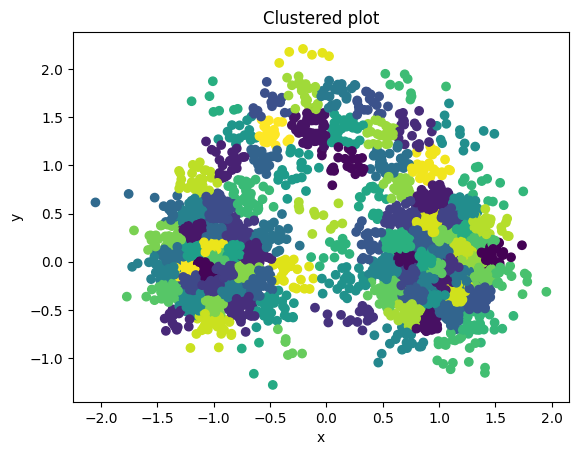

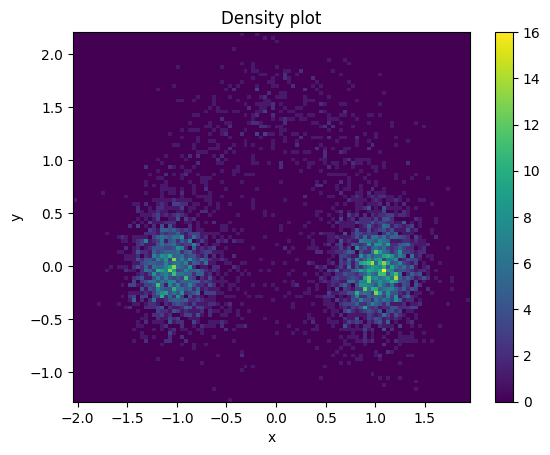

In [5]:
# Plot the trajectory
plt.figure()
plt.scatter(df['x'], df['y'], c=kmeans.labels_, cmap='viridis', marker='o')
plt.title('Clustered plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Plot the 2D histogram (density plot)
plt.figure()
plt.hist2d(df['x'], df['y'], bins=100, cmap='viridis')
plt.title('Density plot')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()


**Exercise 4: Write a program that calculates the count matrix from the discretized trajectory. That is, an n x n matrix that, in its ijth element, contains the number of transitions from i to j and where n is the number of states.**

Count Matrix:


<Figure size 640x480 with 0 Axes>

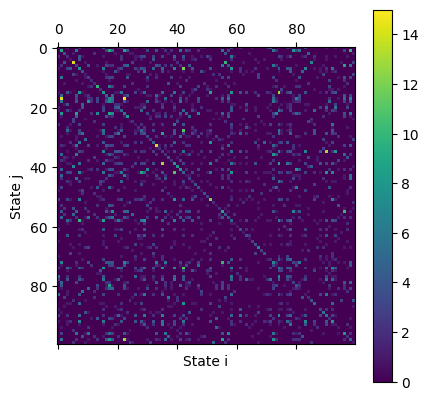

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1,0,0,1,0,0,0,2,0,0,...,1,0,0,1,0,0,0,0,0,0
1,0,9,0,0,0,0,6,0,0,0,...,0,0,0,0,0,0,3,0,10,0
2,0,0,4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,0,0,4,1,0,...,1,0,0,1,0,0,0,1,0,0
4,0,0,0,0,1,0,0,4,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,3,0,0,0,0,6,0,0,1,...,0,0,0,0,1,0,8,0,2,0
97,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,2,0,0
98,0,6,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,2,0,5,0


In [6]:
count_matrix = np.zeros((100, 100), dtype=int)
for i in range(1, len(df)):
    from_state = df.iloc[i - 1,2]
    to_state = df.iloc[i,2]
    count_matrix[from_state, to_state] += 1

print("Count Matrix:")

plt.figure()
plt.matshow(count_matrix)
plt.xlabel('State i')
plt.ylabel('State j')
plt.colorbar()
plt.show()

count_df = pd.DataFrame(count_matrix, columns=range(100), index=range(100))
count_df

**Exercise 5: Based on the count matrix, calculate the transition matrix. That is, an n x n matrix that, in its ijth element, contains the transition probability from i to j. Note that the rows sum to one! You may use the trivial estimator described in the lecture slides to calculate the transition matrix.**

Transition Matrix:


<Figure size 640x480 with 0 Axes>

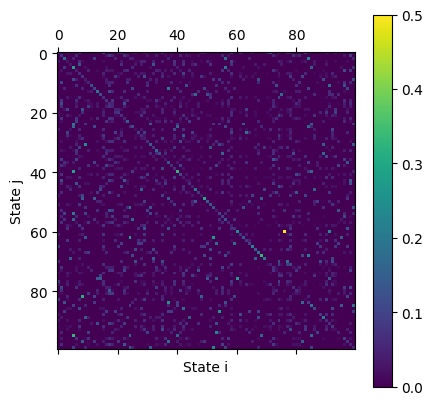

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.025641,0.000000,0.000000,0.025641,0.000000,0.000000,0.000000,0.051282,0.000000,0.000000,...,0.025641,0.0,0.0,0.025641,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.077586,0.000000,0.000000,0.000000,0.000000,0.051724,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.025862,0.000000,0.086207,0.000000
2,0.000000,0.000000,0.181818,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.045455
3,0.030769,0.000000,0.000000,0.030769,0.000000,0.000000,0.000000,0.061538,0.015385,0.000000,...,0.015385,0.0,0.0,0.015385,0.000000,0.0,0.000000,0.015385,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.034483,0.000000,0.000000,0.137931,0.000000,0.000000,...,0.034483,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
96,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.011905,...,0.000000,0.0,0.0,0.000000,0.011905,0.0,0.095238,0.000000,0.023810,0.000000
97,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.076923,0.000000,0.000000
98,0.000000,0.065217,0.000000,0.000000,0.000000,0.000000,0.021739,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.021739,0.000000,0.054348,0.000000


In [7]:
transition_matrix = count_matrix / count_matrix.sum(axis=1, keepdims=True)

print("Transition Matrix:")
plt.figure()
plt.matshow(transition_matrix)
plt.xlabel('State i')
plt.ylabel('State j')
plt.colorbar()
plt.show()

transition_df = pd.DataFrame(transition_matrix, columns=range(100), index=range(100))
transition_df

**Exercise 6: Make comments about what you can say so far about the underlying dynamical system that this trajectory stems from (e.g., how many macrostates do you observe? Can you guess which transition is the slowest?)**

From its density plot (2d histogram), we can see that there is mainly two states. We can see macrostate 1 spanning from (-1.25,-0.5) to (-0.5,0.5) and macrostate 2 spanning from (0.75,-0.5) to (1.5,0.5). It seems to me that the slowest transition is between those two macrostates (the middle). That is because the transition barrier is highest.

**Exercise 7: Calculate the eigenvalues from the obtained transition matrix from $T(\tau)$. What can you say about the timescale of the slowest processes? Assume a lag time $\tau$ = 1. You may use common software packages like numpy to do the eigendecomposition. It is possible that you get complex values for the eigenvalues/eigenvector. In that case you may discard the imaginary part. Note that you can easily convert the eigenvalues into timescales (Obs:The correct formula should be $t_{\text{ex,i}}(\tau) = - \frac{\tau}{log|\lambda_{i}|}$).**

In [8]:
eigenvalues, eigenvectors = np.linalg.eig(transition_matrix)
eigenvalues = np.real(eigenvalues)
timescales = -1 / np.log(np.abs(eigenvalues))

# Display eigenvalues and corresponding timescales
print("Eigenvalues:")
print(eigenvalues)

print("\nTimescales:")
print(timescales)

Eigenvalues:
[ 1.          0.98842788  0.90490977  0.70062248  0.5943149   0.55627744
  0.5019622   0.45356959  0.420918    0.35766352  0.35766352 -0.28146739
  0.31210661  0.29488108  0.29488108  0.28553551  0.24993011  0.24993011
 -0.21122729 -0.11703581 -0.11703581  0.21176462  0.21176462 -0.18752107
  0.20021385  0.07967135  0.07967135  0.170193    0.170193   -0.14684546
 -0.08063406 -0.08063406 -0.10431105 -0.10431105  0.12649344  0.12649344
  0.14551801  0.14148773  0.14148773  0.11886157  0.11886157 -0.11229526
 -0.10438315 -0.10438315 -0.03918062 -0.03918062  0.05941723  0.05941723
 -0.03034197 -0.03034197  0.08074029  0.08074029  0.07647496  0.07647496
 -0.08762906 -0.08762906 -0.09177089 -0.09177089  0.04146987  0.04146987
 -0.06870316 -0.06870316  0.09273462  0.09273462  0.09210388  0.08433308
  0.08433308  0.01817626  0.01817626 -0.07208731 -0.0063166  -0.0063166
 -0.06069757 -0.06069757  0.00409856  0.00409856  0.04357154  0.04357154
 -0.0434754  -0.0434754  -0.00562907 -0

In [9]:

idxs = np.where(eigenvalues == max(eigenvalues))
idx = idxs[0][0]
eigenvalues[idx]

1.0000000000000004

Since the higher the eigenvalues the slower processe. We could think that the slower processe is cluster 0. However, the first eigenvalue and eigenvector is always 1. That is because it belongs to the stationary distribution. In the following plots, the first eigenvalue/eigenvector has always been omitted. As it can be seen the slowest process is cluster 1, which is approximately 86 time steps

In [10]:
idxs = np.where(eigenvalues == max(eigenvalues[1:]))
idx = idxs[0][0]
print(f"cluster: {idx}")
print(f"eigenvalue: {eigenvalues[idx]}")
print(f"timescale: {timescales[idx]}")

cluster: 1
eigenvalue: 0.9884278795951928
timescale: 85.91361656074373


the four slowest processes
eigenvalues: [0.5943149  0.70062248 0.90490977 0.98842788]
timescsles: [ 1.92179834  2.81067772 10.00800187 85.91361656]


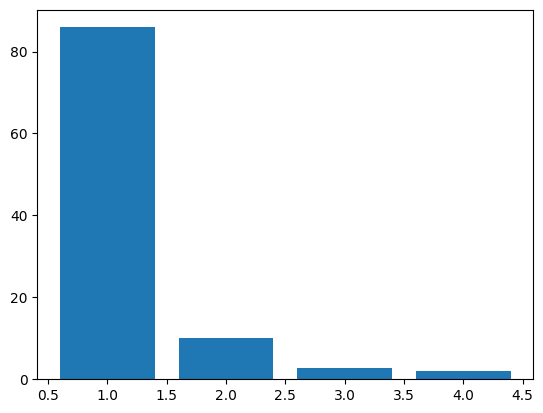

In [11]:
print("the four slowest processes")
idxs = np.argpartition(eigenvalues[1:], -4)[-4:]
print(f"eigenvalues: {eigenvalues[1:][idxs]}")
print(f"timescsles: {timescales[1:][idxs]}")
plt.figure()
plt.bar(idxs+1,timescales[1:][idxs])
plt.show()


**Exercise 8: Visualise the first few eigenfunctions of the system depending on how many slow processes you observed. Describe what the eigenfunctions tell you about the system in question. Your visualization may look something like this: `plt.scatter(\*traj.T, c=eigvecs[:, i][dtraj])` where traj is the continuous trajectory, eigvecs are the n by n eigenvector matrix, where you're accessing the ith eigenvector, and dtraj is the discretized trajectory.**

/home/miriam/.local/lib/python3.10/site-packages/matplotlib/axes/_axes.py:4411: ComplexWarning: Casting complex values to real discards the imaginary part
  c = np.asanyarray(c, dtype=float)


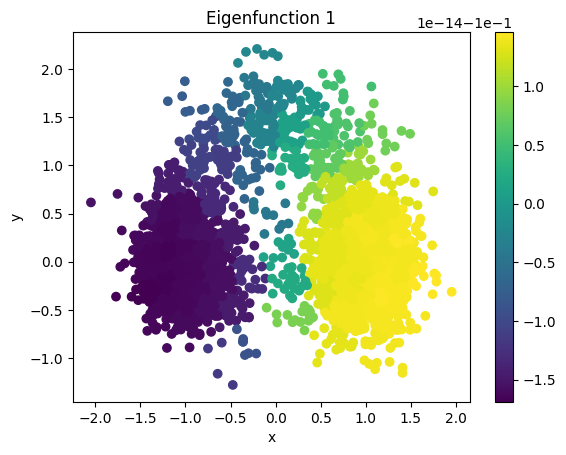

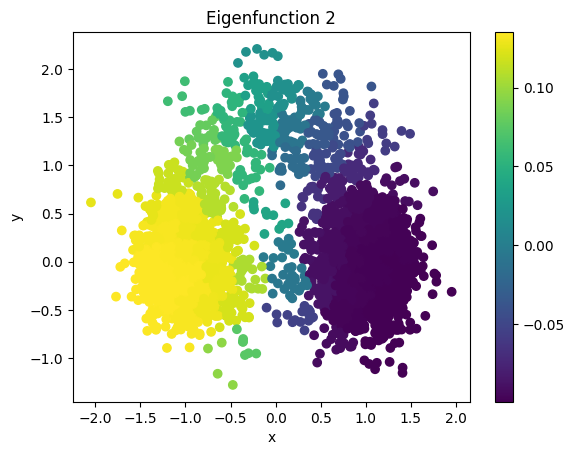

In [12]:
for i in range(2):
    plt.figure()
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=eigenvectors[:, i][df.iloc[:,2]])
    
    plt.title(f'Eigenfunction {i + 1}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.colorbar()
    plt.show()

**Exercise 9: Discretize the continuous trajectory again (trajectory file). This time in: 3, 10, 100, 1000 states and visualize the leading eigenfunctions and timescales as a function of number of states (3, 10, 100, 1000). Comment on the quality of the discretization as the number of states increase. Also, do you see a difference in the estimated timescale of the slowest process as the number of states increases? Comment on why or why not you observe these differences.**

* 3: Discretizing the trajectory with 3 states, we observe that the slowest process is cluster 0, since the eigenvalue of cluster 1 is 1.

/home/miriam/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


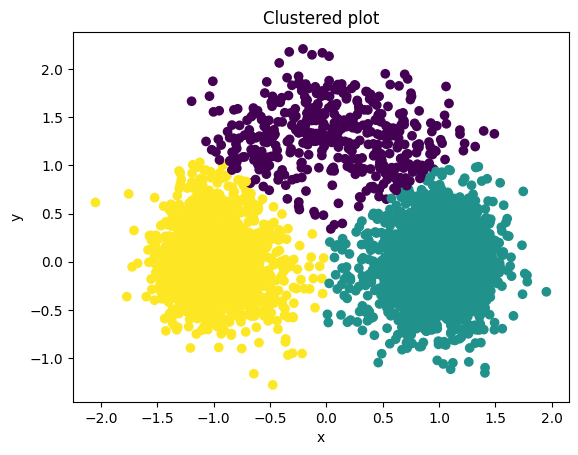

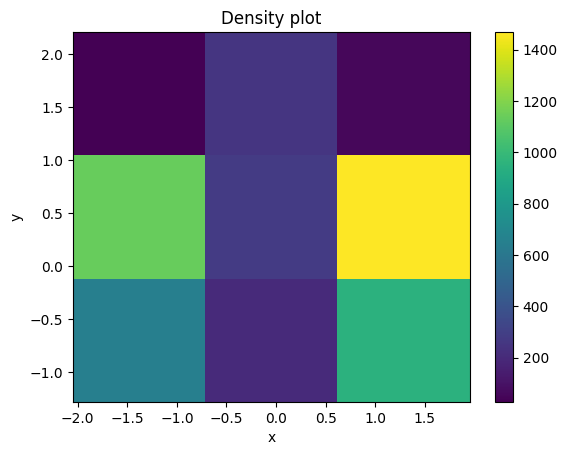

<Figure size 640x480 with 0 Axes>

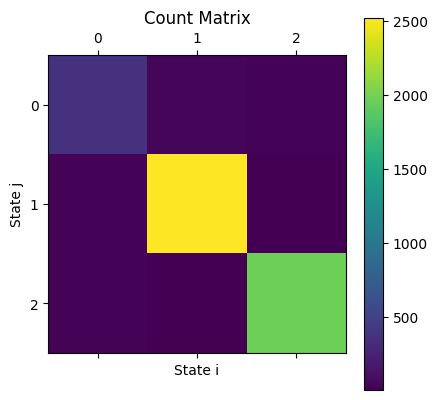

<Figure size 640x480 with 0 Axes>

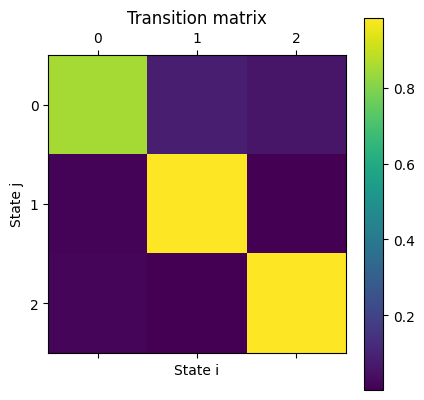

eigenvalues: [0.83566606 1.         0.97847263]
timescsles: [-5.57021768e+00 -4.50359963e+15 -4.59506790e+01]


In [14]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data)

df = data.copy()
df['Cluster'] =  kmeans.labels_
df[:5]

# Plot the trajectory
plt.figure()
plt.scatter(df['x'], df['y'], c=kmeans.labels_, cmap='viridis', marker='o')
plt.title('Clustered plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Plot the 2D histogram (density plot)
plt.figure()
plt.hist2d(df['x'], df['y'], bins=3, cmap='viridis')
plt.title('Density plot')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

# Plot the count matrix
count_matrix = np.zeros((3, 3), dtype=int)
for i in range(1, len(df)):
    from_state = df.iloc[i - 1,2]
    to_state = df.iloc[i,2]
    count_matrix[from_state, to_state] += 1
plt.figure()
plt.matshow(count_matrix)
plt.title('Count Matrix')
plt.xlabel('State i')
plt.ylabel('State j')
plt.colorbar()
plt.show()

# Plot the transition matrix
transition_matrix = count_matrix / count_matrix.sum(axis=1, keepdims=True)
plt.figure()
plt.matshow(transition_matrix)
plt.title('Transition matrix')
plt.xlabel('State i')
plt.ylabel('State j')
plt.colorbar()
plt.show()

# Compute the eigenvalues and the timescales
eigenvalues, eigenvectors = np.linalg.eig(transition_matrix)
eigenvalues = np.real(eigenvalues)
timescales = -1 / np.abs(np.log(np.abs(eigenvalues)))

print(f"eigenvalues: {eigenvalues[:]}")
print(f"timescales: {timescales[:]}")

* 10: Discretizing the trajectory with 10 states, we observe that the slowest process is cluster 1, since the eigenvalue of cluster 0 is 1.

/home/miriam/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


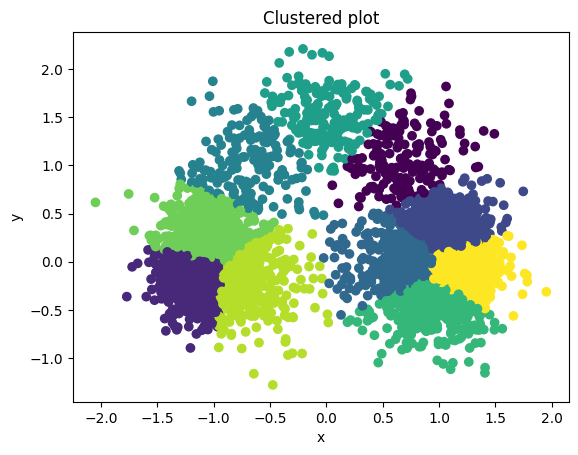

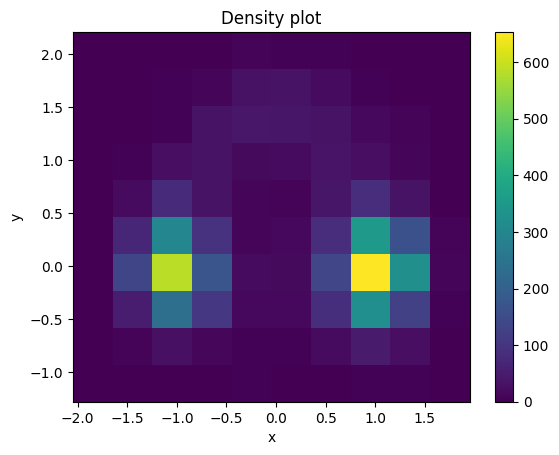

<Figure size 640x480 with 0 Axes>

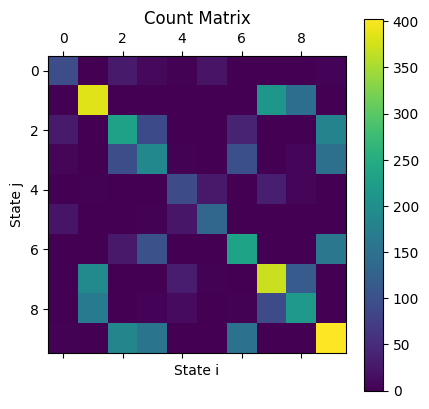

<Figure size 640x480 with 0 Axes>

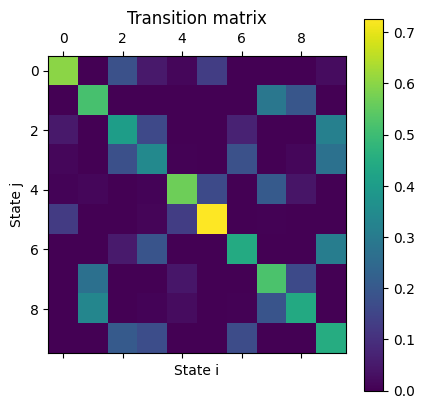

eigenvalues: [1.         0.98421789 0.85453448 0.58587865 0.46250305 0.34742907
 0.11527354 0.17140848 0.20271028 0.28456696]
timescales: [-1.50119988e+15 -6.28615770e+01 -6.36138695e+00 -1.87040839e+00
 -1.29684507e+00 -9.45899502e-01 -4.62867104e-01 -5.66987979e-01
 -6.26575237e-01 -7.95679971e-01]


In [16]:
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(data)

df = data.copy()
df['Cluster'] =  kmeans.labels_
df[:5]

# Plot the trajectory
plt.figure()
plt.scatter(df['x'], df['y'], c=kmeans.labels_, cmap='viridis', marker='o')
plt.title('Clustered plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Plot the 2D histogram (density plot)
plt.figure()
plt.hist2d(df['x'], df['y'], bins=10, cmap='viridis')
plt.title('Density plot')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

# Plot the count matrix
count_matrix = np.zeros((10, 10), dtype=int)
for i in range(1, len(df)):
    from_state = df.iloc[i - 1,2]
    to_state = df.iloc[i,2]
    count_matrix[from_state, to_state] += 1
plt.figure()
plt.matshow(count_matrix)
plt.title('Count Matrix')
plt.xlabel('State i')
plt.ylabel('State j')
plt.colorbar()
plt.show()

# Plot the transition matrix
transition_matrix = count_matrix / count_matrix.sum(axis=1, keepdims=True)
plt.figure()
plt.matshow(transition_matrix)
plt.title('Transition matrix')
plt.xlabel('State i')
plt.ylabel('State j')
plt.colorbar()
plt.show()

# Compute the eigenvalues and the timescales
eigenvalues, eigenvectors = np.linalg.eig(transition_matrix)
eigenvalues = np.real(eigenvalues)
timescales = -1 / np.abs(np.log(np.abs(eigenvalues)))

idxs = np.where(eigenvalues == max(eigenvalues[1:]))
idx = idxs[0][0]
print(f"cluster: {idx}")
print(f"eigenvalue: {eigenvalues[idx]}")
print(f"timescale: {timescales[idx]}")

* 1000: Discretizing the trajectory with 1000 states, we observe that the slowest process is cluster 1, since the eigenvalue of cluster 0 is 1.

/home/miriam/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


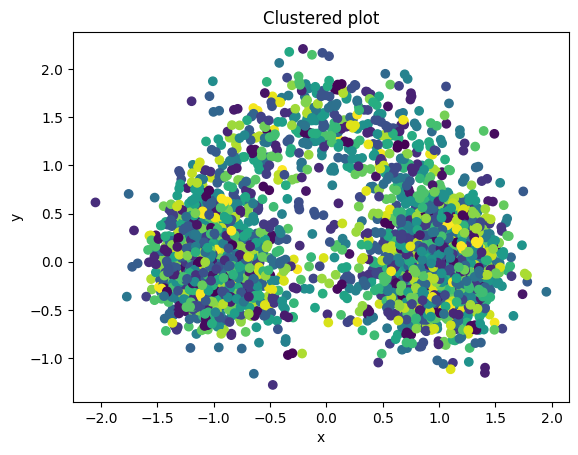

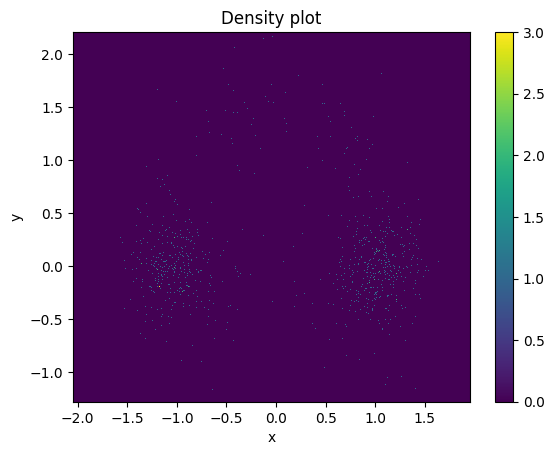

<Figure size 640x480 with 0 Axes>

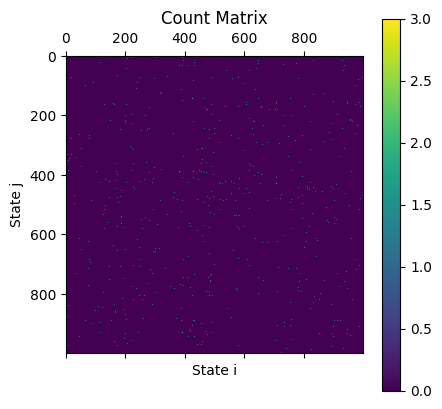

<Figure size 640x480 with 0 Axes>

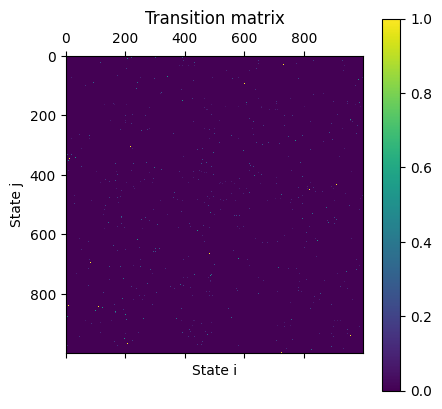

the four slowest processes
eigenvalues: [0.78282715 0.78282715 0.91753478 0.98943671]
timescsles: [ -4.08424382  -4.08424382 -11.61915277 -94.16661279]


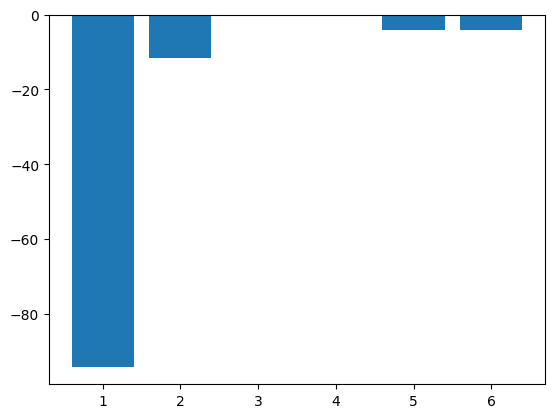

In [21]:
kmeans = KMeans(n_clusters=1000, random_state=0)
kmeans.fit(data)

df = data.copy()
df['Cluster'] =  kmeans.labels_
df[:5]

# Plot the trajectory
plt.figure()
plt.scatter(df['x'], df['y'], c=kmeans.labels_, cmap='viridis', marker='o')
plt.title('Clustered plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Plot the 2D histogram (density plot)
plt.figure()
plt.hist2d(df['x'], df['y'], bins=1000, cmap='viridis')
plt.title('Density plot')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

# Plot the count matrix
count_matrix = np.zeros((1000, 1000), dtype=int)
for i in range(1, len(df)):
    from_state = df.iloc[i - 1,2]
    to_state = df.iloc[i,2]
    count_matrix[from_state, to_state] += 1
plt.figure()
plt.matshow(count_matrix)
plt.title('Count Matrix')
plt.xlabel('State i')
plt.ylabel('State j')
plt.colorbar()
plt.show()

# Plot the transition matrix
transition_matrix = count_matrix / count_matrix.sum(axis=1, keepdims=True)
plt.figure()
plt.matshow(transition_matrix)
plt.title('Transition matrix')
plt.xlabel('State i')
plt.ylabel('State j')
plt.colorbar()
plt.show()

# Compute the eigenvalues and the timescales
eigenvalues, eigenvectors = np.linalg.eig(transition_matrix)
eigenvalues = np.real(eigenvalues)
timescales = -1 / np.abs(np.log(np.abs(eigenvalues)))

print("the four slowest processes")
idxs = np.argpartition(eigenvalues[1:], -4)[-4:]
print(f"eigenvalues: {eigenvalues[1:][idxs]}")
print(f"timescsles: {timescales[1:][idxs]}")
plt.figure()
plt.bar(idxs+1,timescales[1:][idxs])
plt.show()

# print(f"eigenvalues: {eigenvalues[:]}")
# print(f"timescales: {timescales[:]}")

In [31]:
# maxim = 0
# for i in count_matrix:
#     max = np.max(i)
#     if max > maxim:
#         maxim = max
# print(maxim)
# len(df)

3


Conclusions: With a discretization greater than 100 we obtain very little information, that is, for example in the discretization of 1000, the maximum number of instances in a cluster is 3, therefore, the classification of the instances is almost redundant, this is due because the number of instances we have is only 5000.

On the other hand, as the discretization increases, we observe that the timescale in absolute value also increases.